# Lab 2: Two-Slit Single Photon at a Time

The Two-slit experiment utilized both a laser and a light bulb as the source of photons. For the laser measurements, voltage readings were taken to measure the interference pattern of the photons after passing the double slit within the apparatus. For the bulb, a photomultiplier tube (PMT) was used along with an oscilloscope and a pulse counter/interval timer (PCIT) in order to count the individual photons passing through the apparatus into the PMT. The PCIT was set to a $10$ $second$ interval thus each initial reading of the counts was in $\frac{counts}{10 \textit{ sec.}}$ and then converted into $\frac{counts}{1 \textit{ sec.}}$. 

The detector blocker was moved using a micrometer and each adjustment was recorded for the position data. This allowed us to plot the interference pattern over designated increments of the micrometer. These increments were adjusted depending on the pattern themselves, for the single slit pattern we used a constant increment of $0.4mm$. Yet for the double slit, we started with an increment of $0.2$ $mm$, and reduced this to $0.1$ $mm$ in between the $2$ $mm$ & $6$ $mm$ range to allow for more definition in the main pattern.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Data Structure

Below each file is loaded in and each column of is assigned to variables designating the position, voltage, or counts. These variable names are organized by `_L` or `_B` for laser or bulb respectively. While the middle portions `_D_`, `_L_`,`_R_` designate the double slit, left slit, or right slit respectively. The `position` variables are each measured distance of the detector blocker's position. The `voltage` variables are of the measurements for the laser in $mV$, while the `counts` are of the PCIT measured counts per $10$ $seconds$ that were converted to counts per $1$ $second$.

In [6]:
################
## Load Files ##
################
#
#########
# Laser #
####################################################################
# Laser Double Slit 
file_double_L = 'L_both_slit.csv'
data_double_L = np.loadtxt(file_double_L, skiprows=1, delimiter=',')
# Laser Left
file_Left_L = 'L_left_slit.csv'
data_Left_L = np.loadtxt(file_Left_L, skiprows=1, delimiter=',')
# Laser Right
file_Right_L = 'L_right_slit.csv'
data_Right_L = np.loadtxt(file_Right_L, skiprows=1, delimiter=',')
# Laser Background
file_BGL_L = 'L_left_no_slit.csv'
data_BGL_L = np.loadtxt(file_BGL_L, skiprows=1, delimiter=',')
file_BGR_L = 'L_right_no_slit.csv'
data_BGR_L = np.loadtxt(file_BGR_L, skiprows=1, delimiter=',')
###################################################################
#
########
# Bulb #
####################################################
# Bulb Double
file_double_B='Bulb_both_slit.csv'
data_double_B=np.loadtxt(file_double_B, skiprows=1,delimiter=',')
# Blub Left
file_Left_B = 'Bulb_left_slit.csv'
data_Left_B = np.loadtxt(file_Left_B, skiprows=1, delimiter=',')
# Blub Right
file_right_B = 'Bulb_right_slit.csv'
data_right_B = np.loadtxt(file_right_B, skiprows=1, delimiter=',')
# Bulb Background
file_BGL_B = 'Bulb_left_no_slit.csv'
data_BGL_B = np.loadtxt(file_BGL_B, skiprows=1, delimiter=',')
file_BGR_B = 'Bulb_right_no_slit.csv'
data_BGR_B = pd.read_csv(file_BGR_B, delimiter=',')
######################################
#
###########################
## assign the Laser data ##
###########################
#
################
# Laser Double #######################
# - Convert position to meters(*0.001)
position_D_L = data_double_L[:,0]*0.001
# Voltage Measurments Double Slit
voltage_D_1  = data_double_L[:,1] 
voltage_D_2  = data_double_L[:,2]
voltage_D_3  = data_double_L[:,3]
#################################
#
##############
# Laser Left #########################
# - Convert position to meters(*0.001)
position_L_L = data_Left_L[:,0]*0.001
# Voltage Measurments Left Slit
voltage_L_1  = data_Left_L[:,1] 
voltage_L_2  = data_Left_L[:,2]
voltage_L_3  = data_Left_L[:,3]
#################################
#
###############
# Laser Right ########################
# - Convert position to meters(*0.001)
position_R_L = data_Right_L[:,0]*0.001
# Voltage Measurments Right Slit
voltage_R_1  = data_Right_L[:,1] 
voltage_R_2  = data_Right_L[:,2]
voltage_R_3  = data_Right_L[:,3]
#################################
#
##########################
## assign the bulb data ##
##########################
#
###############
# Bulb doulbe ##########################
# - Convert position to meters(*0.001)
position_D_B = data_double_B[:,0]*0.001
# measurments (Counts/10 sec) converted to 
#   (Counts/1 sec)
counts_D_1   = data_double_B[:,1]/10
counts_D_2   = data_double_B[:,2]/10
counts_D_3   = data_double_B[:,3]/10
#######################################
#
#############
# Bulb Left ##########################
# - Convert position to meters(*0.001)
position_L_B = data_Left_B[:,0]*0.001
# measurments (Counts/10 sec) converted to 
#   (Counts/1 sec)
counts_L_1   = data_Left_B[:,1]/10
counts_L_2   = data_Left_B[:,2]/10
counts_L_3   = data_Left_B[:,3]/10
#######################################
#
##############
# Bulb Right ##########################
# - Convert position to meters(*0.001)
position_R_B = data_right_B[:,0]*0.001
# measurments (Counts/10 sec) converted to 
#   (Counts/1 sec)
counts_R_1   = data_right_B[:,1]/10
counts_R_2   = data_right_B[:,2]/10
counts_R_3   = data_right_B[:,3]/10
#######################################

In [5]:
data_BGR_B.head()

,Position,readings 1 (count/10sec.),readings 2 (count/10sec.),readings 3 (count/10sec.)
0,0.0,62,58,61
1,0.5,74,70,69
2,1.0,77,42,66
3,1.5,65,78,58
4,2.0,67,75,65


## Background

As can be seen in the data files for the background readings, we found a constant measurement of **0.008** which is utilized for the best fits. We did find a few outliers as we passed the $8$ $mm$ mark on the micrometer yet this was disregarded as the pattern is located between the marks of $2$ $mm$ & $8$ $mm$.

In [70]:
print(data_BGL_L[:,1] )
print(data_BGR_L[:,1] )

[0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008
 0.008 0.008 0.008 0.008 0.008 0.008 0.011 0.016 0.02 ]
[0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008
 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]


# Best Fit Function

For our model, we utilized the **Fraunhofer** model presented within the lab manual. This uses the assumption that the light will act as a plane wave from an infinitely far source. This assumption is for both before and after the light passes through the double-slit. The following is the **Fraunhofer** model equation: 

\begin{align*}
    I(0) = I_0(\cos{\beta})^2(\frac{\sin{\alpha}}{\alpha})^2 
\end{align*}

where:


- $\alpha = \frac{\pi a}{\lambda}\sin{\theta}$  
- $\beta = \frac{\pi d}{\lambda}\sin{\theta}$


and the following are the given constants:
- The slit-width: a = 0.085 mm
- Center-to-separation: d = 0.353 mm
- Laser wavelength:  $\lambda_{laser}$ = 0.670 $\pm$ 0.005 $\mu$ m
- Bulb wavelength:  $\lambda_{bulb}$ = 0.541 to 0.551 $\mu$ m


From this it can be assumed that the variable $\theta$ expresses the radiation pattern, yet we further this by finding the relation of:

\begin{align*}
    \theta = \arctan{\frac{x}{l}} + \phi
\end{align*}

where the position of the micrometer is $x$, the length of the chamber of travel is $l = 50$ $cm$, and $\phi$ is the phase shift parameter for the best fit.


The model was modified for the single slits by setting the Center-to-seperation distance $d=0$, as there is only one slit, which in turn makes $\beta = 0$. Using this value for $\beta$ shows that we can disregard the $\cos$ term as $(\cos{0})^2 = 1$.

In [155]:
################
# Fit Function #
################
# - Two slit 
#
def Best_Fit(x, I_o, d, a, l, Lamb, phi, BG):
    # Relations
    Alpha = ((np.pi*a)/Lamb)*np.sin(np.arctan2(x,l)+phi)
    Beta  = ((np.pi*d)/Lamb)*np.sin(np.arctan2(x,l)+phi)
    # Return fit function
    return I_o*(np.cos(Beta)**2 *(np.sin(Alpha)/Alpha)**2) + BG
###############################################################
# - One slit
def Best_Fit_One(x, I_o, a, l, Lamb, phi, BG):
    Zeta = (2 * np.pi * a * np.sin(np.arctan2(x, l) + phi)/Lamb)
    return I_o * ((np.sin(Zeta/2.0)**2)/(Zeta/2.0)**2) + BG

# Laser 

The error bars created below are from the standard deviation of each measurement at the specific detector blocker position which shows the error within each measurement. The average of the measurements was taken and plotted as each point with the error bars representing the standard deviation and the best fit showing the overall pattern emerging from the points.

For the Laser data in particular, there are noticeable points where the standard deviation is $0$ as each measurement was identical. However, as the digital multi-meter has an error of $\pm 0.0005$ $v$ we can set a minimum error using this uncertainty. This is achieved below by scanning each standard deviation value using `==0`, then if this was the case replacing the $0$ value with the minimum error using `=0.0005` within the `if` statement. 

In [227]:
#######################
# Mean & Standard Dev #
#######################
# -Laser Double
Voltage_avg_doub = (voltage_D_1+voltage_D_2+voltage_D_3)/3
STD_Laser_array_D  = np.array([voltage_D_1,voltage_D_2,voltage_D_3])
Voltage_STD_doub = np.std(STD_Laser_array_D,axis=0)
###########
# -Laser Left
Voltage_avg_left = (voltage_L_1+voltage_L_2+voltage_L_3)/3
STD_Laser_array_L  = np.array([voltage_L_1,voltage_L_2,voltage_L_3])
Voltage_STD_left = np.std(STD_Laser_array_L,axis=0)
############
# -Laser Right
Voltage_avg_right = (voltage_R_1+voltage_R_2+voltage_R_3)/3
STD_Laser_array_R  = np.array([voltage_R_1,voltage_R_2,voltage_R_3])
Voltage_STD_right = np.std(STD_Laser_array_R,axis=0)
##############################
#
#####################
# Set minimum Error #
######################
#
for ii in range(len(Voltage_STD_doub)):
        if Voltage_STD_doub[ii]  == 0:
            Voltage_STD_doub[ii] = 0.0005
for ii in range(len(Voltage_STD_left)):            
        if Voltage_STD_left[ii]  ==0:
            Voltage_STD_left[ii] = 0.0005
        if Voltage_STD_right[ii] ==0:
            Voltage_STD_right[ii]= 0.0005
#########################################

[ 1.36092356e+03  3.64325508e-06  6.28331813e-07  2.26651731e+00
  1.16199446e-09 -1.83026839e-03  4.54037461e+01]
[ 3.53721970e+02  6.67928633e-06  1.92134202e-02  1.35999566e-06
 -1.82380446e-01  1.15927831e+01]
[ 3.77910203e+02  6.52581696e-05  3.40492405e+00  7.50946063e-08
 -1.38761328e-03  2.91771970e+01]


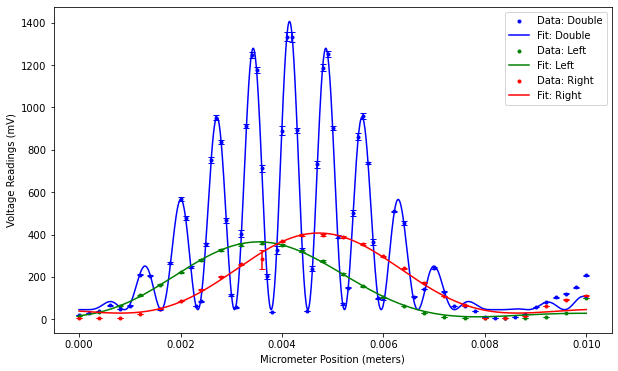

In [228]:
plt.figure(figsize=(10, 6))
#############
# Constants #
a    = 0.085e-3
d    = 0.353e-3
l    = 0.5
Lamb = 0.600e-6
x = np.linspace(0,0.01,1000)
###############
#
##########
# Double #
##############
# Parameters #
phi = -0.0085
BG  = 0.1
I_o = 1600
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt1, pcov1 = curve_fit(Best_Fit,
                        position_D_L ,
                        Voltage_avg_doub,
                        p0=guess,
                        maxfev=100000)
print(popt1)
####
plt.scatter(position_D_L,
            Voltage_avg_doub,
            color='blue',
            marker='.',
            label='Data: Double'
           )
plt.plot(x,Best_Fit(x,*popt1),
        color='blue',
        label='Fit: Double'
        )
plt.errorbar(
    position_D_L, 
    Voltage_avg_doub, 
    yerr=Voltage_STD_doub,
    color='blue',
    ls='none',
    capsize=3
)
##################################################################
#
########
# LEFT #
##############
# Parameters #
phi_L   = -0.0088
BG_L    = 0.1
I_o_L   = 400
guess_L = np.array([I_o_L,a,l,Lamb,phi_L,BG_L])
##########################################
popt1_L, pcov1_L = curve_fit(Best_Fit_One,
                        position_L_L,
                        Voltage_avg_left,
                        p0=guess_L,
                        maxfev=100000)
print(popt1_L)
####
plt.scatter(position_L_L,
            Voltage_avg_left,
            color='green',
            marker='.',
            label='Data: Left'
           )
plt.plot(x,Best_Fit_One(x,*popt1_L),
        color='green',
        label='Fit: Left'
        )
plt.errorbar(
    position_L_L, 
    Voltage_avg_left, 
    yerr=Voltage_STD_left,
    color='green',
    ls='none',
    capsize=3
)
################################################################
#
#########
# RIGHT #
##############
# Parameters #
phi_R   = -0.008
BG_R    = 0.1
I_o_R   = 350
guess_R = np.array([I_o_R,a,l,Lamb,phi_R,BG_R])
##########################################
popt1_R, pcov1_R = curve_fit(Best_Fit_One,
                        position_R_L,
                        Voltage_avg_right,
                        p0=guess_R,
                        maxfev=100000)
print(popt1_R)
####
plt.scatter(position_R_L,
            Voltage_avg_right,
            color='red',
            marker='.',
            label='Data: Right'
           )
plt.plot(x,Best_Fit_One(x,*popt1_R),
        color='red',
        label='Fit: Right'
        )
plt.errorbar(
    position_R_L, 
    Voltage_avg_right, 
    yerr=Voltage_STD_right,
    color='red',
    ls='none',
    capsize=3
)
##################################
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings (mV)')
plt.legend()
plt.show()

# Bulb

The error bars created below are from the standard deviation of each measurement at the specific detector blocker position which shows the error within each measurement. The average of the measurements was taken and plotted as each point with the error bars representing the standard deviation and the best fit showing the overall pattern emerging from the points.

In [215]:
#######################
# Mean & Standard Dev #
#######################
# -Laser Double
counts_avg_doub = (counts_D_1+counts_D_2+counts_D_3)/3
STD_Bulb_array_D  = np.array([voltage_D_1,voltage_D_2,voltage_D_3])
counts_STD_doub = np.std(STD_Laser_array_D,axis=0)
###########
# -Laser Left
counts_avg_left = (counts_L_1+counts_L_2+counts_L_3)/3
STD_Bulb_array_L  = np.array([counts_L_1,counts_L_2,counts_L_3])
counts_STD_left = np.std(STD_Bulb_array_L,axis=0)
############
# -Laser Right
counts_avg_right = (counts_R_1+counts_R_2+counts_R_3)/3
STD_Bulb_array_R  = np.array([counts_R_1,counts_R_2,counts_R_3])
counts_STD_right = np.std(STD_Bulb_array_R,axis=0)
##############################

[ 4.27677977e+02  2.66618766e-05  4.50413422e-06  2.92717682e+00
  5.52034579e-09 -1.42664413e-03  2.32019778e+01]
[ 1.03643704e+02  4.19826953e-06  8.82064204e-03  1.26665329e-06
 -3.76106283e-01  2.11011187e+01]
[ 1.19594229e+02  7.99605030e-05  4.40203767e-01  6.01007106e-07
 -1.07916870e-02  2.31610344e+01]


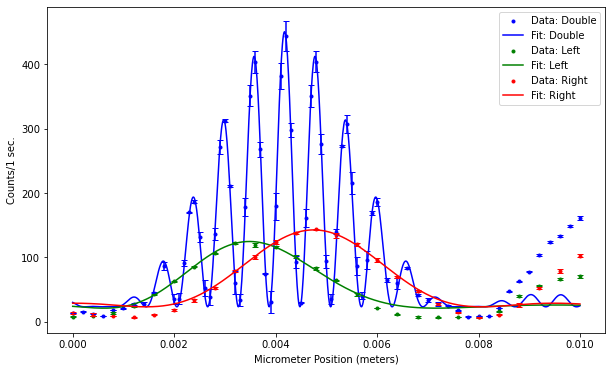

In [226]:
plt.figure(figsize=(10, 6))
#############
# Constants #
a    = 0.085e-3
d    = 0.353e-3
l    = 0.5
Lamb = 0.541e-6
x = np.linspace(0,0.01,1000)
###############
#
##########
# Double #
##############
# Parameters #
d_BD = 1.44522093e-05
a_BD = 2.49249214e-06
l_BD = 2.10394743e+00
Lamb_BD = 4.46560986e-09
phi_BD = -1.97169094e-03
BG_BD = 0.1
I_o_BD = 490
guess_DB = np.array([I_o_BD,
                     d_BD,
                     a_BD,
                     l_BD,
                     Lamb_BD,phi_BD,BG_BD])
##########################################
popt_BulbD, pcov_BulbD = curve_fit(Best_Fit,
                        position_D_B[0:61],
                        counts_avg_doub[0:61],
                        p0=guess_DB,
                        maxfev=100000)
print(popt_BulbD)
####
plt.scatter(position_D_B,
            counts_avg_doub,
            color='blue',
            marker='.',
            label='Data: Double'
           )
plt.plot(x,Best_Fit(x,*popt_BulbD),
        color='blue',
        label='Fit: Double'
        )
plt.errorbar(
    position_D_B, 
    counts_avg_doub, 
    yerr=counts_STD_doub,
    color='blue',
    ls='none',
    capsize=3
)
##################################################################
#
########
# LEFT #
##############
# Parameters #
phi_L   = -0.0088
BG_L    = 0.1
I_o_L   = 125
guess_L = np.array([I_o_L,a,l,Lamb,phi_L,BG_L])
##########################################
popt_BulbL, pcov_BulbL = curve_fit(Best_Fit_One,
                        position_L_B,
                        counts_avg_left,
                        p0=guess_L,
                        maxfev=100000)
print(popt_BulbL)
####
plt.scatter(position_L_B,
            counts_avg_left,
            color='green',
            marker='.',
            label='Data: Left'
           )
plt.plot(x,Best_Fit_One(x,*popt_BulbL),
        color='green',
        label='Fit: Left'
        )
plt.errorbar(
    position_L_B, 
    counts_avg_left, 
    yerr=counts_STD_left,
    color='green',
    ls='none',
    capsize=3
)
################################################################
#
#########
# RIGHT #
##############
# Parameters #
phi_R   = -0.008
BG_R    = 0.9
I_o_R   = 125
guess_R = np.array([I_o_R,a,l,Lamb,phi_R,BG_R])
##########################################
popt_BulbR, pcov_BulbR = curve_fit(Best_Fit_One,
                        position_R_B,
                        counts_avg_right,
                        p0=guess_R,
                        maxfev=100000)
print(popt_BulbR)
####
plt.scatter(position_R_B,
            counts_avg_right,
            color='red',
            marker='.',
            label='Data: Right'
           )
plt.plot(x,Best_Fit_One(x,*popt_BulbR),
        color='red',
        label='Fit: Right'
        )
plt.errorbar(
    position_R_B, 
    counts_avg_right, 
    yerr=counts_STD_right,
    color='red',
    ls='none',
    capsize=3
)
##################################
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Counts/1 sec.')
plt.legend()
plt.show()

# Conclusion

As we examine the first graph from our laser data we can see the diffraction pattern from the double-slit data which is a clear sign of the wave-like nature of the photons being emitted from the laser source. This of course is caused by the interference of the waves coming from either of the two slits. The peaks of the graph represent the constructive parts where both waves have joined to significantly magnify the intensity of the light, and the destructive parts are shown as the dips of the graph where the waves have fully interfered with each other causing almost no light to be measured at their respective positions. We also see the non-interference pattern from our single slit data, which shows the single wave nature which is not being interfered with by any other wave.

Next, as we examine the graph for the bulb we can see that the diffraction pattern also emerges for the single photon. As both the laser and bulb graphs are similar we can conclude the same wave-like nature for the bulb's photon emission as we had for the laser source. Where this becomes interesting is when we recognize that the bulb source is calibrated to emit single photons at a time. From this, we can now introduce the proven paradox which is the main goal of this experiment. This paradox is that we are witnessing a single photon particle, or quanta, traveling through our apparatus, and displaying wave-like behavior as it reaches the detector. Particle wave duality tells us that we can observe a photon as either a wave or as a particle, yet within this experiment, we see both the particle and wave behaviors occurring within the same time frame. Thus as we see the diffraction pattern emerge from the single photons traveling from the light source we can conclude that we have successfully proven the paradox.  


## Fitting Errors

We found that the pattern after the $8$ $mm$ position the data became skewed, and thus was not included within the fit. The reason we found this was due to light leaking past the double slit. We were able to determine this while performing one of our many realignments. Following the light with a card all the way to the detector blocker showed this as even though we had a visually accurate diffraction pattern there seemed to be a spot of light near the right-hand side. This side would be exposed when going past the $8$ $mm$ and seemed to be centered on the $10$ $mm$ mark. Thus, we concluded that this was light leaking past the previous slits causing an unwanted increase in light intensity. For this reason, we decided not to include this section within the best fit and decided to treat these as outliers. 